In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Credit.csv")

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (10127, 23)


In [ ]:
data.isnull().any().any()

False

In [ ]:
data=data[0:500]

In [ ]:
data.shape

(500, 23)

In [ ]:
x = data.loc[:, ['Customer_Age',
                 'Credit_Limit','Total_Revolving_Bal']].values

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

In [ ]:
print(distances)

[[0.00000000e+00 8.84646822e+01]
 [0.00000000e+00 1.19515689e+02]
 [0.00000000e+00 1.80277564e+01]
 [0.00000000e+00 2.94278779e+01]
 [0.00000000e+00 1.27393092e+02]
 [0.00000000e+00 2.22227361e+02]
 [0.00000000e+00 1.00000000e+01]
 [0.00000000e+00 2.26187975e+02]
 [0.00000000e+00 4.18019138e+02]
 [0.00000000e+00 4.32038193e+02]
 [0.00000000e+00 1.52934627e+02]
 [0.00000000e+00 2.63336287e+02]
 [0.00000000e+00 4.66004292e+02]
 [0.00000000e+00 3.72155881e+01]
 [0.00000000e+00 2.54190873e+02]
 [0.00000000e+00 1.31087757e+02]
 [0.00000000e+00 4.84809241e+02]
 [0.00000000e+00 1.45258390e+01]
 [0.00000000e+00 6.33482439e+01]
 [0.00000000e+00 3.81943713e+02]
 [0.00000000e+00 4.21246958e+02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.18670986e+02]
 [0.00000000e+00 5.61604843e+01]
 [0.00000000e+00 4.66004292e+02]
 [0.00000000e+00 1.06099010e+02]
 [0.00000000e+00 2.64832022e+02]
 [0.00000000e+00 2.61818640e+02]
 [0.00000000e+00 1.70144057e+02]
 [0.00000000e+00 1.00324474e+02]
 [0.000000

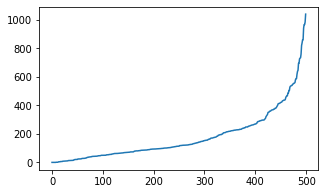

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 700, min_samples = 5).fit(x) 
labels = dbscan.labels_ 

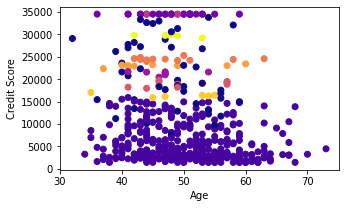

In [ ]:
plt.scatter(x[:, 0], x[:,1],c = labels, cmap= "plasma")
plt.xlabel("Age") 
plt.ylabel("Credit Score") 
plt.show() 

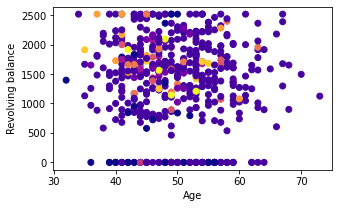

In [ ]:
plt.scatter(x[:, 0],x[:,2] ,c = labels, cmap= "plasma")
plt.xlabel("Age") 
plt.ylabel("Revolving balance") 
plt.show() 

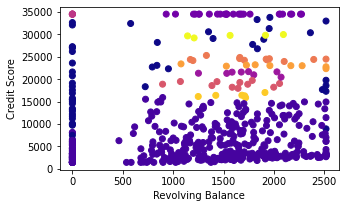

In [ ]:
plt.scatter(x[:, 2],x[:,1] ,c = labels, cmap= "plasma")
plt.ylabel("Credit Score") 
plt.xlabel("Revolving Balance") 
plt.show() 